In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [165]:
import os
print(os.getcwd()) # shows which directory you are operating in. In this case it is "Code Examples"

C:\Users\Casey\Desktop\ECGR 4105\Code Examples


In [166]:
df = pd.read_csv('D3.csv') # searches for files to read in "Code Examples" folder
df.head() # To get first n rows from the dataset default value of n is 5
M=len(df)
M

# nt = pd.read_csv('Numbers.csv')
# nt.head()
# S=len(nt)
# S

99

In [167]:
x1 = df.values[:, 0] # get input values from first column
x2 = df.values[:, 1] # get output values from second column
x3 = df.values[:, 2]
Y = df.values[:, 3]

m = len(x1) # Number of training examples
print('x1 = ', x1[: 5]) # Show only first 5 records
print('x2 = ', x2[: 5])
print('x3 = ', x3[: 5])
print('Y = ', Y[: 5])
print('m = ', m)

# WORKING

x1 =  [0.04040404 0.08080808 0.12121212 0.16161616 0.2020202 ]
x2 =  [0.13494949 0.82989899 1.52484848 2.21979798 2.91474747]
x3 =  [0.88848485 1.3369697  1.78545455 2.23393939 2.68242424]
Y =  [2.6796499  2.96848981 3.25406475 3.53637472 3.81541972]
m =  99


Text(0.5, 1.0, 'Scatter plot of training data (Y vs. x1)')

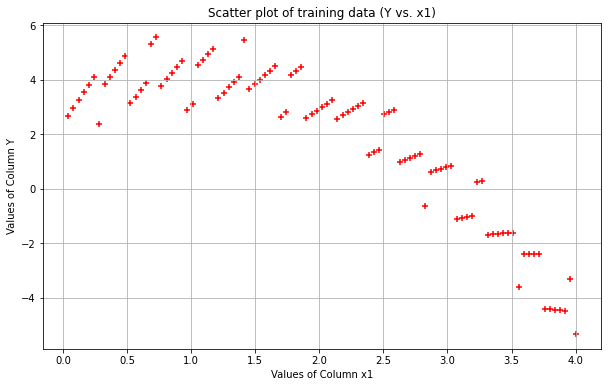

In [168]:
plt.scatter(x1,Y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Values of Column x1')
plt.ylabel('Values of Column Y')
plt.title('Scatter plot of training data (Y vs. x1)')

Text(0.5, 1.0, 'Scatter plot of training data (Y vs. x2)')

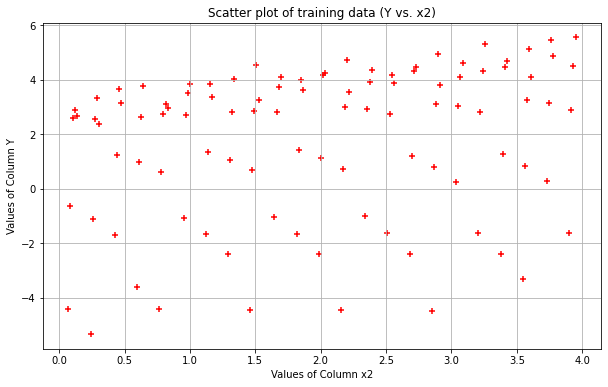

In [169]:
plt.scatter(x2,Y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Values of Column x2')
plt.ylabel('Values of Column Y')
plt.title('Scatter plot of training data (Y vs. x2)')

Text(0.5, 1.0, 'Scatter plot of training data (Y vs. x3)')

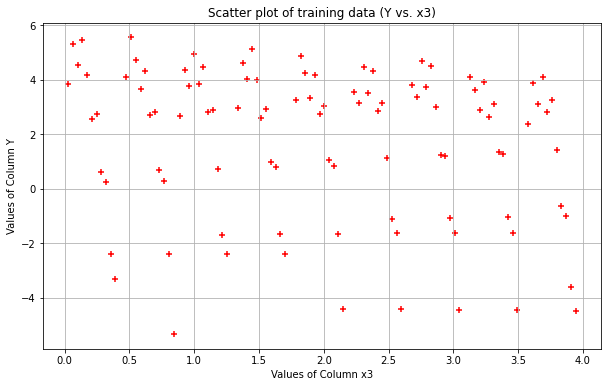

In [170]:
plt.scatter(x3,Y, color='red',marker= '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Values of Column x3')
plt.ylabel('Values of Column Y')
plt.title('Scatter plot of training data (Y vs. x3)')

In [171]:
X_0 = np.ones((m, 1)) # Not sure what these lines do ???????
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [172]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = x1.reshape(m, 1)
X_2 = x2.reshape(m, 1)
X_3 = x3.reshape(m, 1)

X_2[:10] # only shows first 10 values of X_1

array([[0.13494949],
       [0.82989899],
       [1.52484848],
       [2.21979798],
       [2.91474747],
       [3.60969697],
       [0.30464646],
       [0.99959596],
       [1.69454545],
       [2.38949495]])

In [173]:
X_a = np.hstack((X_0, X_1))
X_b = np.hstack((X_0, X_2))
X_c = np.hstack((X_0, X_3))
print('X_a = ',X_a[:5])
print('X_b = ',X_b[:5])
print('X_c = ',X_c[:5])

X_a =  [[1.         0.04040404]
 [1.         0.08080808]
 [1.         0.12121212]
 [1.         0.16161616]
 [1.         0.2020202 ]]
X_b =  [[1.         0.13494949]
 [1.         0.82989899]
 [1.         1.52484848]
 [1.         2.21979798]
 [1.         2.91474747]]
X_c =  [[1.         0.88848485]
 [1.         1.3369697 ]
 [1.         1.78545455]
 [1.         2.23393939]
 [1.         2.68242424]]


In [174]:
theta = np.array([0,0]) # Array of theta values [theta 1, theta 2]
theta

array([0, 0])

In [175]:
def compute_cost(X, Y, theta):
# """
# Compute cost for linear regression.
# Input Parameters
# ----------------
# X : 2D array where each row represent the training example and each column represent
# m= number of training examples
# n= number of features (including X_0 column of ones)
# y : 1D array of labels/target value for each traing example. dimension(1 x m)
# theta : 1D array of fitting parameters or weights. Dimension (1 x n)
# Output Parameters
# -----------------
# J : Scalar value.
# """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [202]:
# Lets compute the cost for theta values
cost_1 = compute_cost(X_a, Y, theta)
cost_2 = compute_cost(X_b, Y, theta)
cost_3 = compute_cost(X_c, Y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost_1)

The cost for given values of theta_0 and theta_1 = 3.9390991749208792


In [177]:
def gradient_descent(X, y, theta, alpha, iterations):
# """
# Compute cost for linear regression.
# Input Parameters
# ----------------
# X : 2D array where each row represent the training example and each column represent
# m= number of training examples
# n= number of features (including X_0 column of ones)
# y : 1D array of labels/target value for each traing example. dimension(m x 1)
# theta : 1D array of fitting parameters or weights. Dimension (1 x n)
# alpha : Learning rate. Scalar value
# iterations: No of iterations. Scalar value.
# Output Parameters
# -----------------
# theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
# cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)"""
# cost_history = np.zeros(iterations)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history

In [190]:
# Test on data in list x1 and Y
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [192]:
theta, cost_history = gradient_descent(X_a, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [1.88949138 0.04035852]
cost_history = [2.45178437 2.27948634 2.12771264 ... 0.67681962 0.6768172  0.6768148 ]


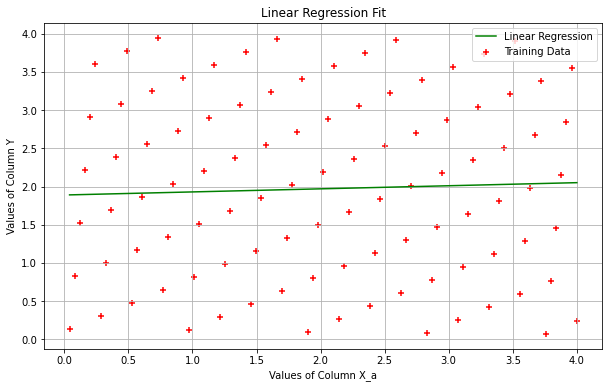

In [196]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X_a[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X_a[:,1],X_a.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Values of Column X_a')
plt.ylabel('Values of Column Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

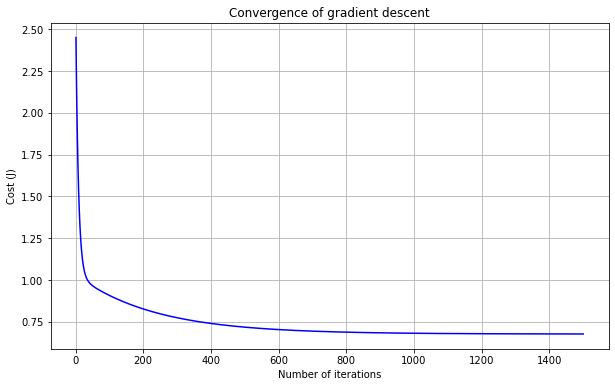

In [181]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [182]:
# Test on data in list x2 and Y
theta = [0., 0.]
iterations = 1500;
alpha = 0.08;

In [183]:
theta, cost_history = gradient_descent(X_b, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [6.53532702e-13 1.00000000e+00]
cost_history = [7.10446641e-01 1.97869197e-01 6.19696993e-02 ... 5.89508593e-26
 5.68886449e-26 5.48514865e-26]


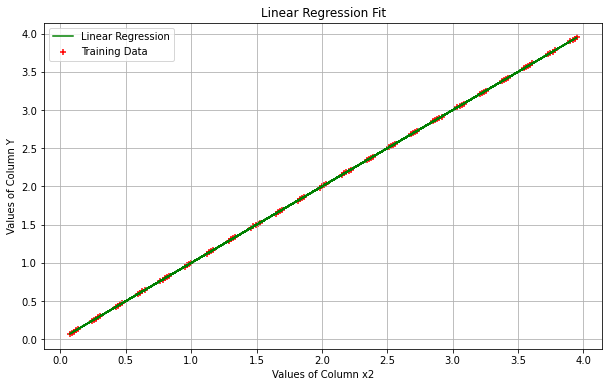

In [184]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X_b[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X_b[:,1],X_b.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Values of Column x2')
plt.ylabel('Values of Column Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

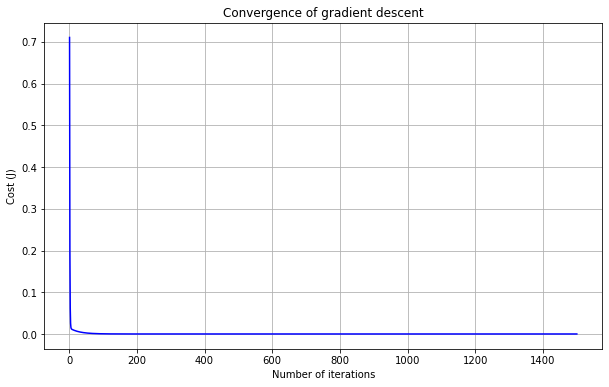

In [185]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

In [186]:
# Test on data in list x3 and Y
theta = [0., 0.]
iterations = 1500;
alpha = 0.08;

In [187]:
theta, cost_history = gradient_descent(X_c, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 2.02888757 -0.02198747]
cost_history = [1.4837483  1.16036389 1.06383872 ... 0.67607231 0.67607231 0.67607231]


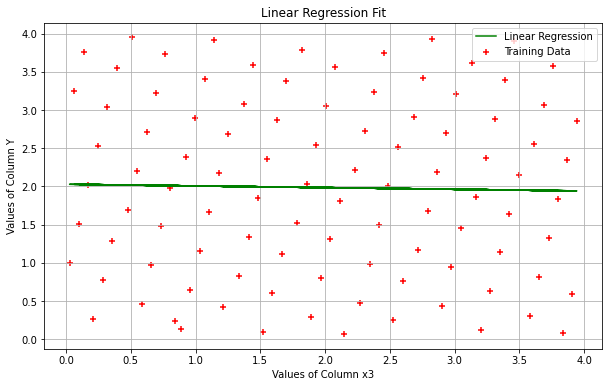

In [188]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X_c[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X_c[:,1],X_c.dot(theta), color='green', label='Linear Regression')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Values of Column x3')
plt.ylabel('Values of Column Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

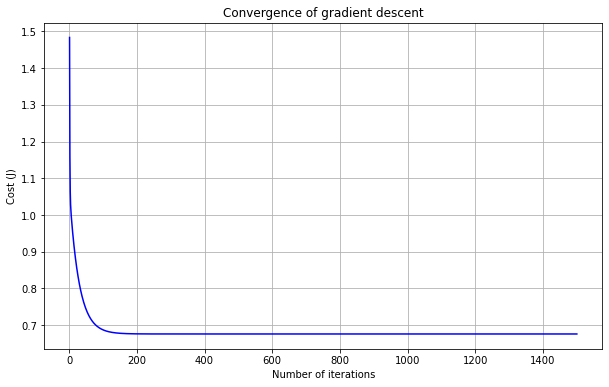

In [189]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')